## Plotting concentration of species X as a function of time of day

For night-time:
$\frac{d[x]}{dt}=P-F_{out}$

Since $F_{out}=k_{out}*[x]$, $\frac{d[x]}{dt}=P-k_{out}*[x]$

$\int\frac{d[x]}{P-k[x]}=\int dt$

$\frac{ln(P-k[x])}{-k}=t+c$

$ln(P-k[x])=-kt+c_1$ where $c_1=-kc$

$P-k[x]=[x]_0*exp(-kt)$ where $[x]_0=e^{c_1}$

$[x]=\frac{P-[x]_0*exp(-kt)}{k}$

and $P=10^6$ molec/(cm^3 * s) = $3.6*10^9$ molec/(cm^3 * hr)

For day-time: (from 2b)

$[x]=[x]_0exp(-(\frac{1}{T_{hv}}+\frac{1}{T_{out}})t)$

$[x]=[x]_0exp(-\frac{t}{T_{tot}})$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [34]:
dt = 0.5
t_early = np.arange(0, 6+dt, dt)
t_mid = np.arange(6, 18+dt, dt)
t_late = np.arange(18, 24+dt, dt)
sunrise = 6
sunset = 18

T_day = 1.14 # hrs
T_night = 4.17 # hrs
k = 1/T_night
P = 3.6*(10**9) # molec/cm*hr

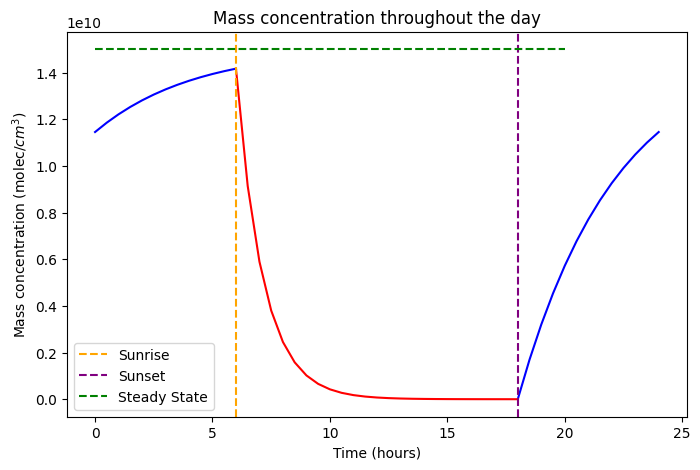

In [57]:
fig, ax = plt.subplots(figsize=(8, 5))

# for hours 18-24, starting at basically zero concentration
X_0 = P # molec/cm^3 (set to P after 1 s to be near zero)
ax.plot(t_late, (P-X_0*np.exp(-k*(t_late-18)))/k, c='blue') # night

# for hours 0-6, starting at hour 6 of night
ax.plot(t_early, (P-X_0*np.exp(-k*(t_early+6)))/k, c='blue') # night

# for hours 6-18, starting at ~ steady state concentration
X_1 = (P-X_0*np.exp(-k*(12)))/k
ax.plot(t_mid, X_1*np.exp(-(t_mid-6)/T_day), c='red') # day

# labels
ax.axvline(sunrise, ls='--', label='Sunrise', c='orange') # sunrise
ax.axvline(sunset, ls='--', label='Sunset', c='purple') # sunset
ax.plot(np.arange(0, 24, 4), 15*(10**9)*np.ones(6), ls='--', c='green', label='Steady State')
ax.set_title('Mass concentration throughout the day')
ax.set_xlabel('Time (hours)')
ax.set_ylabel('Mass concentration (molec/$cm^3$)')
ax.legend();